In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import os

In [23]:
df = pd.read_csv('Search_keyword_report_pickleball.csv', skiprows=2)

In [24]:
df

,Keyword status,Keyword,Match type,Status,Status reasons,Conversions,Currency code,Cost / conv.,Final URL,Mobile final URL,Clicks,Impr.,CTR,Avg. CPC,Cost,Conv. rate
0,Enabled,"""pickleball near me""",Phrase match,Eligible,NaN,3.0,USD,19.06,NaN,NaN,73,653,11.18%,0.78,57.18,4.11%
1,Enabled,pickleball court,Broad match,Eligible,NaN,79.0,USD,8.17,NaN,NaN,891,"4,139",21.53%,0.72,645.54,8.87%
2,Enabled,"""where can i play pickleball near me""",Phrase match,Eligible,NaN,0.0,USD,0.00,NaN,NaN,0,7,0.00%,0.00,0.00,0.00%
3,Enabled,[pickleball courts near me],Exact match,Eligible,NaN,3.0,USD,13.69,NaN,NaN,49,495,9.90%,0.84,41.08,6.12%
4,Enabled,"""pickleball court near me""",Phrase match,Eligible,NaN,0.0,USD,0.00,NaN,NaN,3,50,6.00%,0.23,0.68,0.00%
5,NaN,NaN,Total: All but removed keywords,NaN,NaN,85.0,USD,8.76,NaN,NaN,"1,016","5,344",19.01%,0.73,744.49,8.37%
6,NaN,NaN,Total: Ad group,NaN,NaN,85.0,USD,8.76,NaN,NaN,"1,016","5,344",19.01%,0.73,744.49,8.37%


In [25]:
df.drop([5, 6], inplace=True)

In [26]:
#Clean column names
df.columns = [col.strip() for col in df.columns]

In [27]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5 entries, 0 to 4
Data columns (total 16 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Keyword status    5 non-null      object 
 1   Keyword           5 non-null      object 
 2   Match type        5 non-null      object 
 3   Status            5 non-null      object 
 4   Status reasons    0 non-null      float64
 5   Conversions       5 non-null      float64
 6   Currency code     5 non-null      object 
 7   Cost / conv.      5 non-null      float64
 8   Final URL         0 non-null      float64
 9   Mobile final URL  0 non-null      float64
 10  Clicks            5 non-null      object 
 11  Impr.             5 non-null      object 
 12  CTR               5 non-null      object 
 13  Avg. CPC          5 non-null      float64
 14  Cost              5 non-null      float64
 15  Conv. rate        5 non-null      object 
dtypes: float64(7), object(9)
memory usage: 768.0+ by

In [30]:
#Clean columns by removing -- and 0's 
columns_to_clean = ['Clicks', 'Impr.', 'CTR', 'Cost', 'Conversions', 'Cost / conv.']

for col in columns_to_clean:
    df[col] = df[col].astype(str).replace(['--', ' --'], '0')  
    df[col] = df[col].str.replace(',', '', regex=False)       

In [31]:
#Convert to appropriate data types
df['Clicks'] = pd.to_numeric(df['Clicks'], errors='coerce')
df['Impr.'] = pd.to_numeric(df['Impr.'], errors='coerce')
df['CTR'] = df['CTR'].str.replace('%', '', regex=False).astype(float)
df['Cost'] = pd.to_numeric(df['Cost'], errors='coerce')
df['Conversions'] = pd.to_numeric(df['Conversions'], errors='coerce')
df['Cost / conv.'] = df['Cost / conv.'].str.replace('$', '', regex=False).astype(float)

In [32]:
df

,Keyword status,Keyword,Match type,Status,Status reasons,Conversions,Currency code,Cost / conv.,Final URL,Mobile final URL,Clicks,Impr.,CTR,Avg. CPC,Cost,Conv. rate
0,Enabled,"""pickleball near me""",Phrase match,Eligible,NaN,3.0,USD,19.06,NaN,NaN,73,653,11.18,0.78,57.18,4.11%
1,Enabled,pickleball court,Broad match,Eligible,NaN,79.0,USD,8.17,NaN,NaN,891,4139,21.53,0.72,645.54,8.87%
2,Enabled,"""where can i play pickleball near me""",Phrase match,Eligible,NaN,0.0,USD,0.00,NaN,NaN,0,7,0.00,0.00,0.00,0.00%
3,Enabled,[pickleball courts near me],Exact match,Eligible,NaN,3.0,USD,13.69,NaN,NaN,49,495,9.90,0.84,41.08,6.12%
4,Enabled,"""pickleball court near me""",Phrase match,Eligible,NaN,0.0,USD,0.00,NaN,NaN,3,50,6.00,0.23,0.68,0.00%


In [33]:
#Fill remaining NaNs with 0
df.fillna(0, inplace=True)

In [34]:
#Summary metrics
total_clicks = df['Clicks'].sum()
total_impressions = df['Impr.'].sum()
overall_ctr = (total_clicks / total_impressions) * 100 if total_impressions > 0 else 0
total_conversions = df['Conversions'].sum()
total_cost = df['Cost'].sum()
cost_per_conversion = (total_cost / total_conversions) if total_conversions > 0 else 0

In [48]:
print("Keyword 'Pickleball' Campaign Summary (2.5 months since opening)")
print('---------------------------------------------------------------')
print(f"Total Clicks: {total_clicks}")
print(f"Total Impressions: {total_impressions}")
print(f"Overall CTR: {overall_ctr:.2f}%")
print(f"Total Conversions: {total_conversions}")
print(f"Total Cost: ${total_cost:.2f}")
print(f"Cost per Conversion: ${cost_per_conversion:.2f}")

Keyword 'Pickleball' Campaign Summary (2.5 months since opening)
---------------------------------------------------------------
Total Clicks: 1016
Total Impressions: 5344
Overall CTR: 19.01%
Total Conversions: 85.0
Total Cost: $744.48
Cost per Conversion: $8.76


In [42]:
#Top 3 Keywords by Clicks
top_3 = df.sort_values(by='Clicks', ascending=False).head(3)

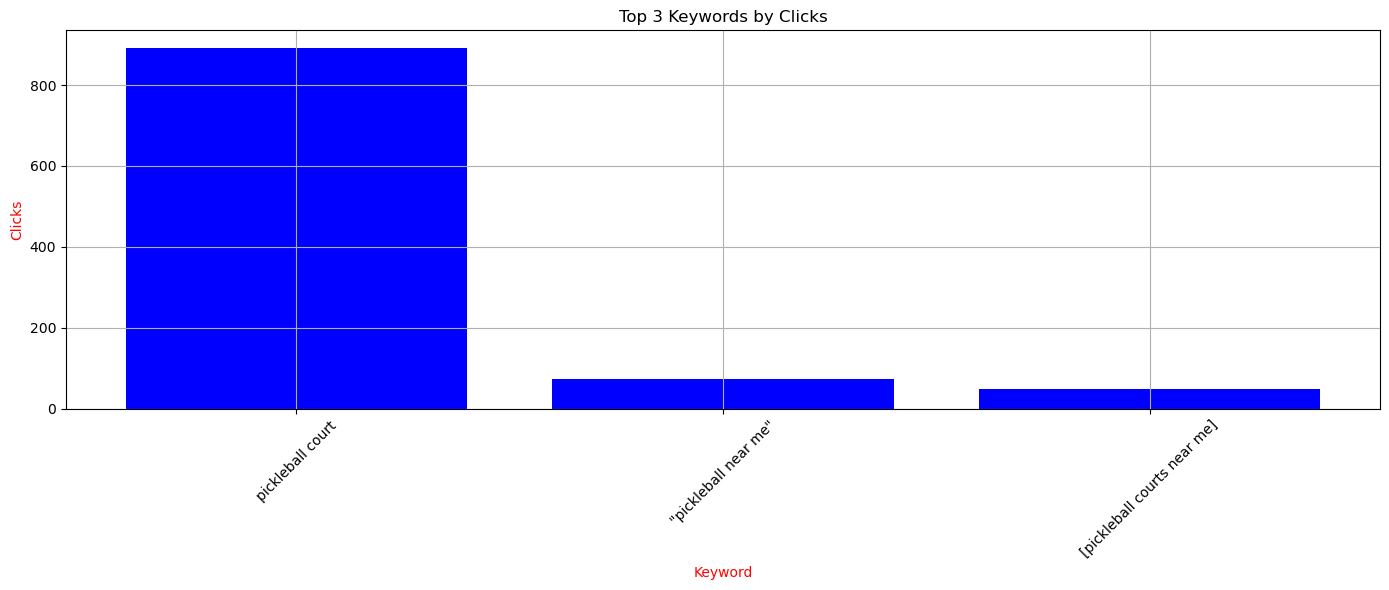

In [47]:
#Plot Clicks 
fig, ax1 = plt.subplots(figsize=(14, 6))
ax1.bar(top_3['Keyword'], top_3['Clicks'], color='blue')
ax1.set_ylabel('Clicks', color='red')
ax1.set_xlabel('Keyword', color='red')
ax1.tick_params(axis='x', rotation=45)

plt.title('Top 3 Keywords by Clicks')
plt.tight_layout()
plt.grid(True)
plt.show()